 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
# Ignoring all warnings
warnings.simplefilter( action = 'ignore', category = FutureWarning)
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path('../Whale-Analysis-MOD-4/whale_returns.csv')


In [3]:
# Count nulls
whale_df = pd.read_csv(whale_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()
whale_df.sort_index(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path('../Whale-Analysis-MOD-4/algo_returns.csv')
algo_df = pd.read_csv(algo_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

In [8]:
algo_df.sort_index(inplace=True)
algo_df.head()
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history = Path('../Whale-Analysis-MOD-4/sp500_history.csv')
sp500_df = pd.read_csv(sp500_history, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head().sort_index()

,Close
Date,
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011
2019-04-22,-0.008764
2019-04-23,NaN


In [13]:
# Drop nulls
sp500_df.dropna(inplace=True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={'Close':'S&P 500'})
sp500_df.head().sort_index()

,S&P 500
Date,
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011
2019-04-22,-0.008764


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

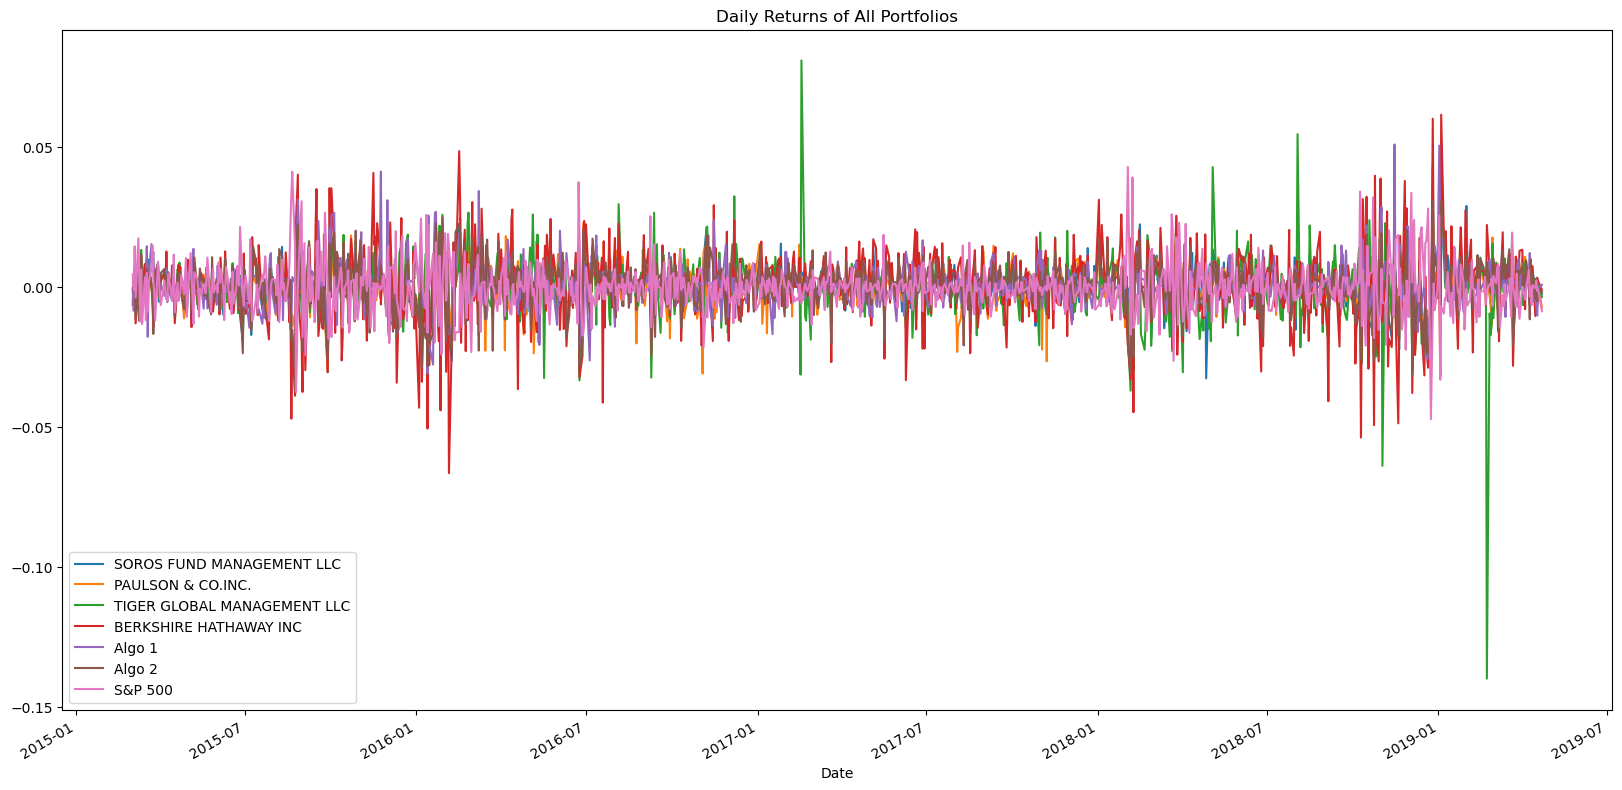

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title='Daily Returns of All Portfolios')

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

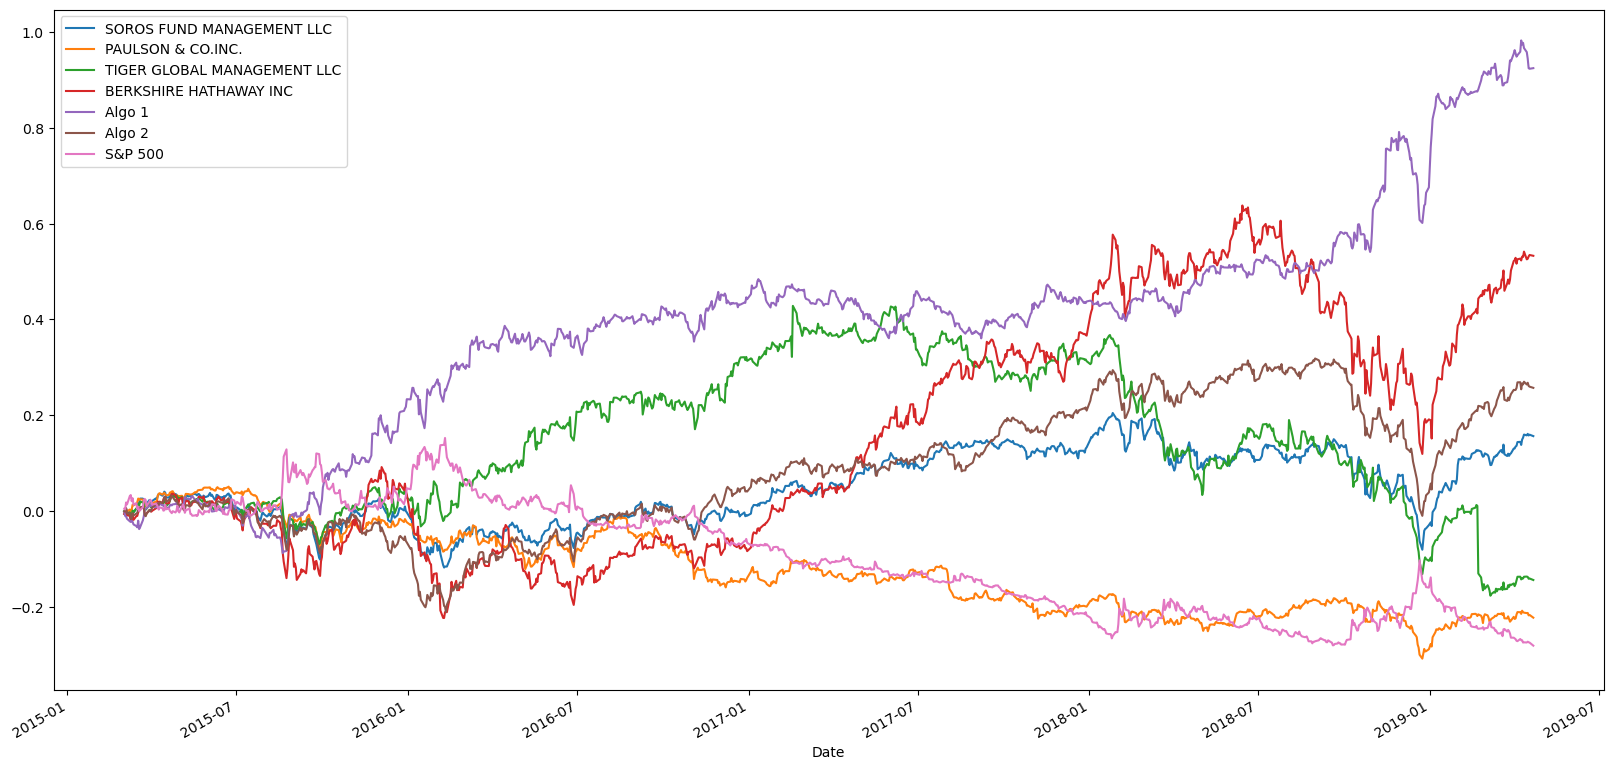

In [17]:
# Calculate cumulative returns of all portfolios
combined_df.sort_index()
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

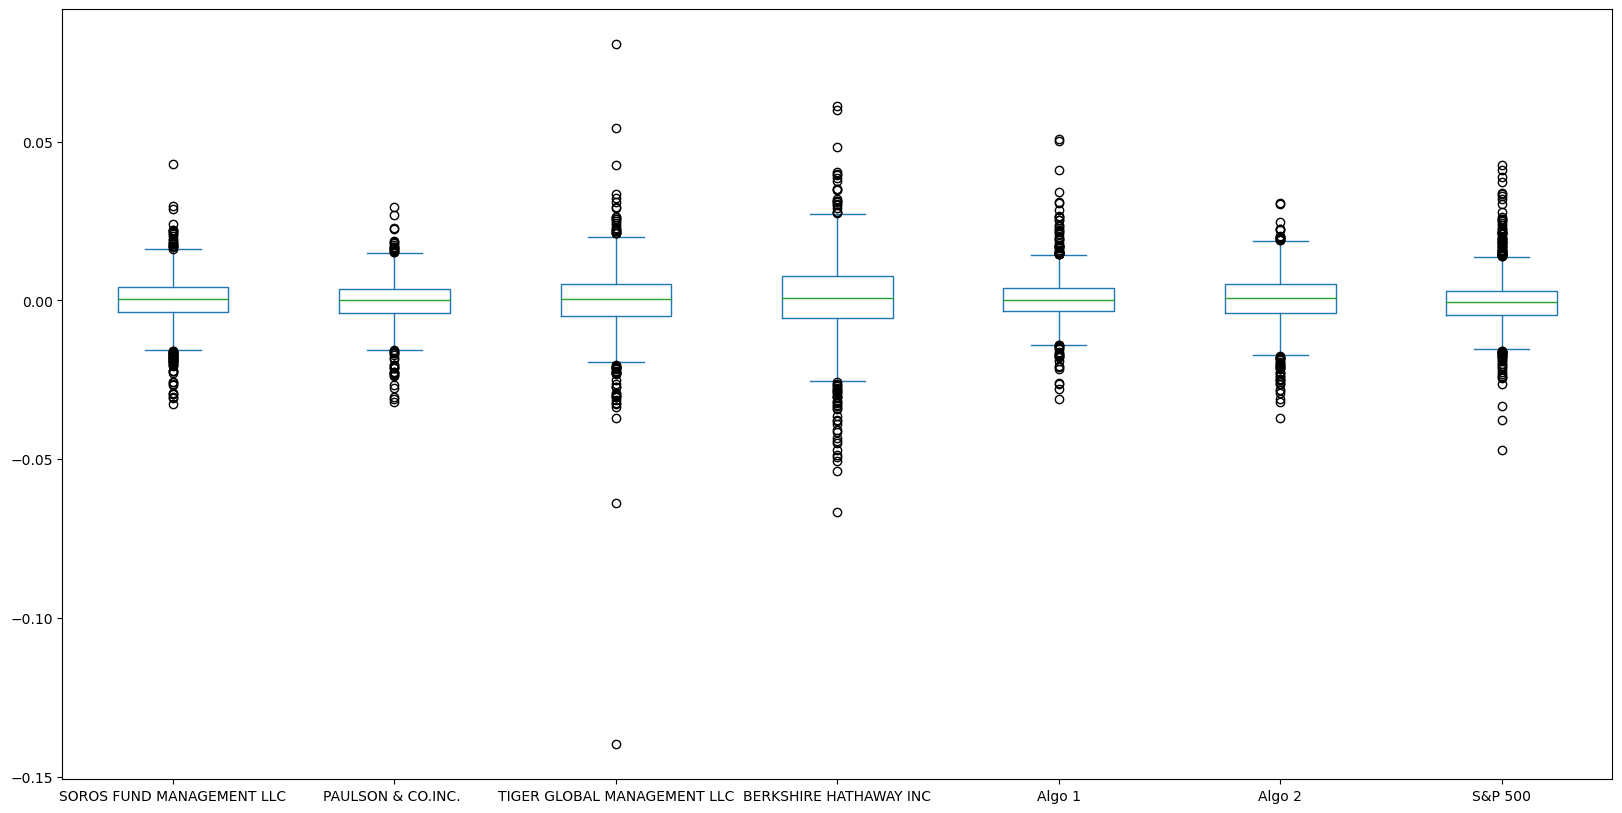

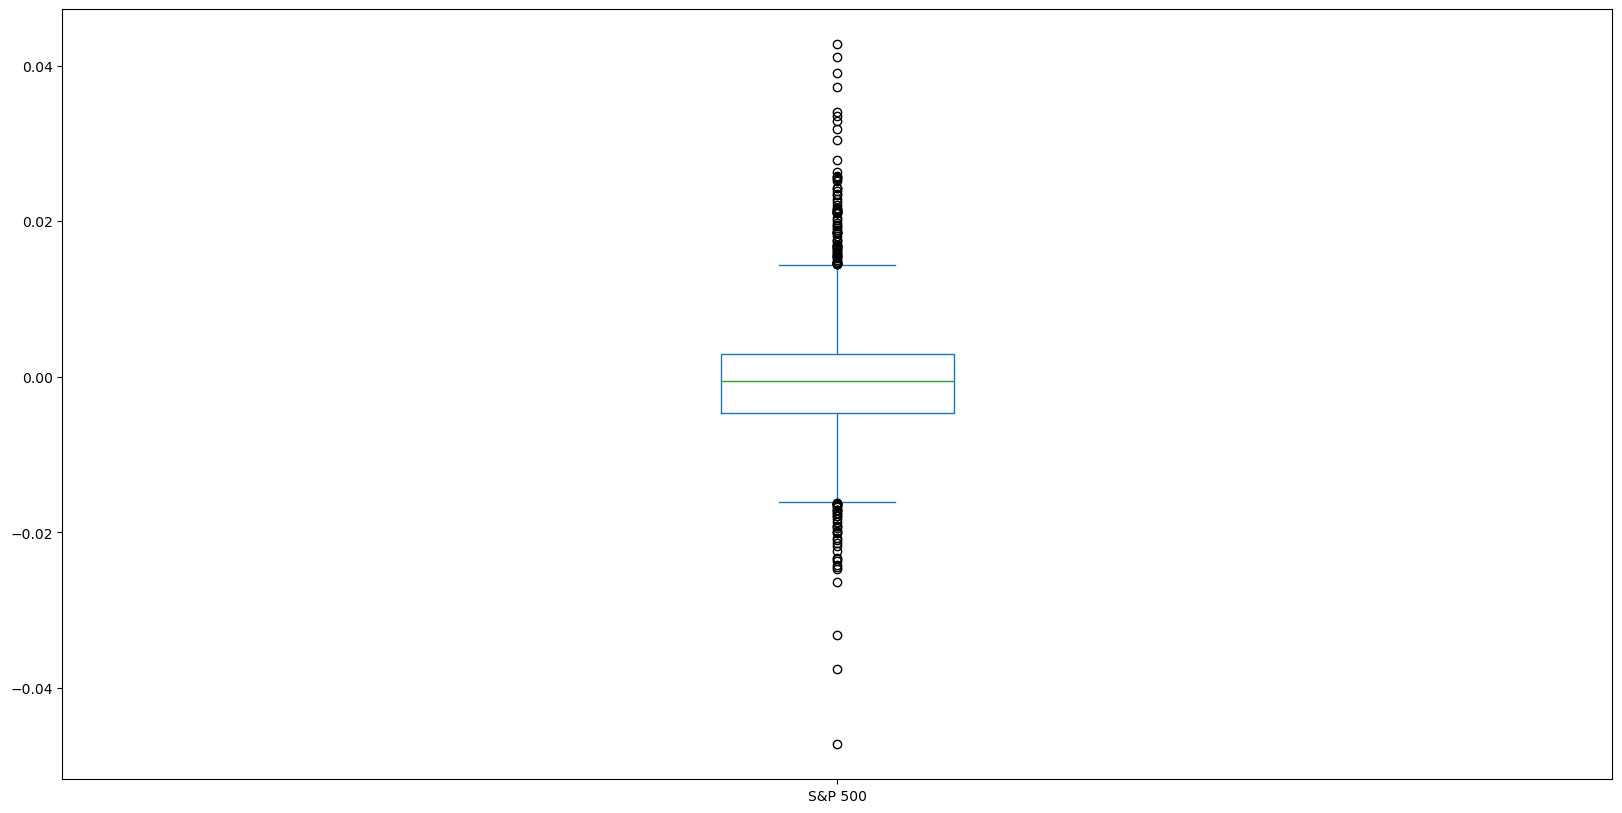

In [18]:
# Box plot to visually show risk
combined_df.plot.box(grid = False,figsize=(20,10))
sp500_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_df.std()
combined_daily_std.sort_values(inplace=True)
combined_daily_std

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
combined_daily_std>combined_daily_std['S&P 500']
# Determine which portfolios are riskier than the S&P 500


PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_daily_std * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}>

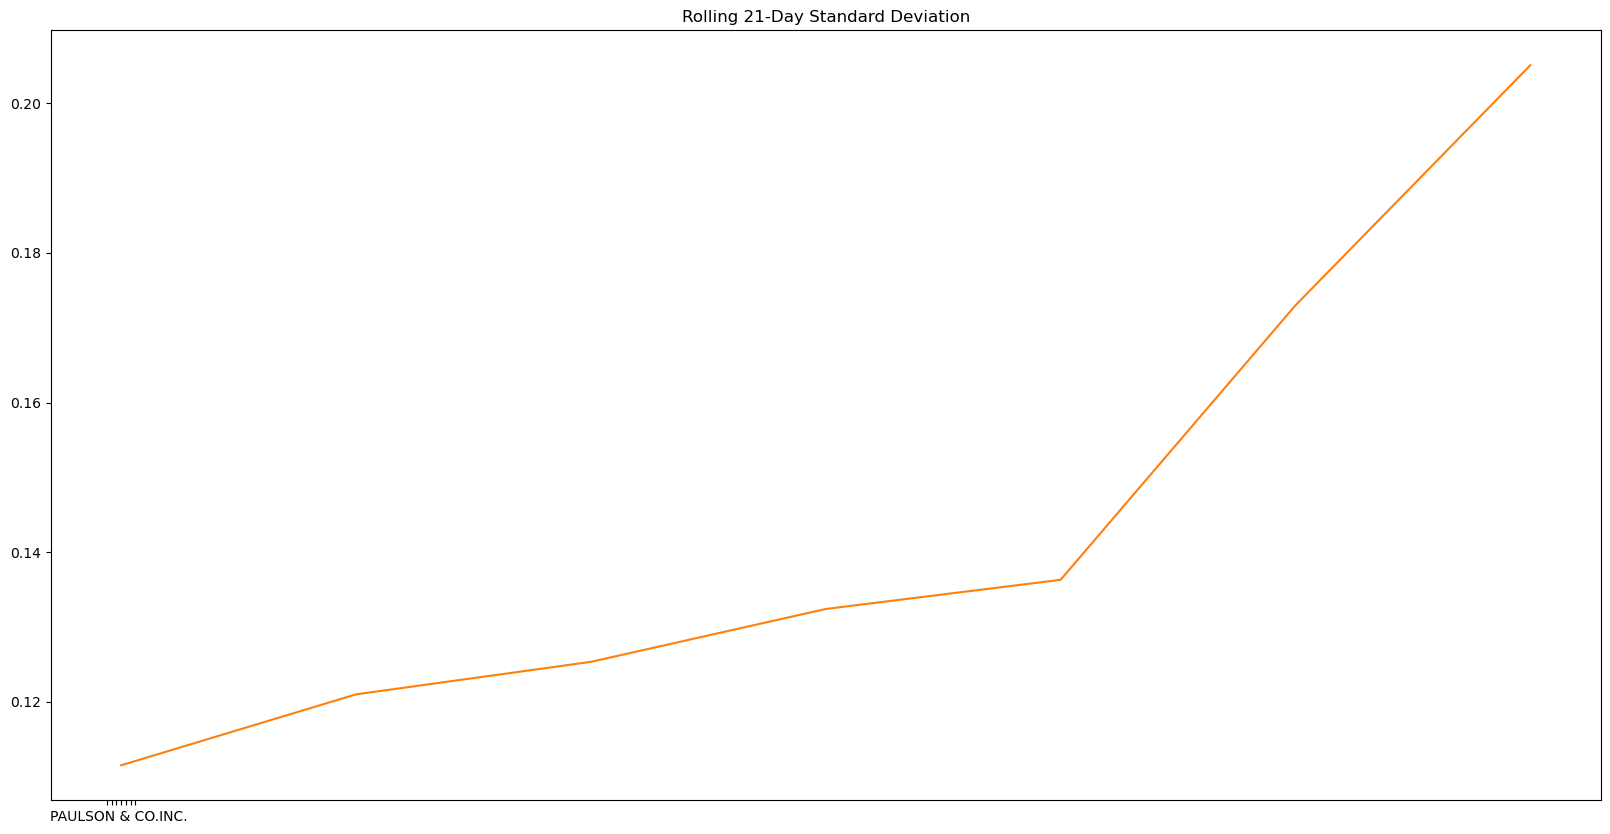

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
annualized_std.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation
annualized_std.plot(grid = False,figsize=(20,10), title='Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

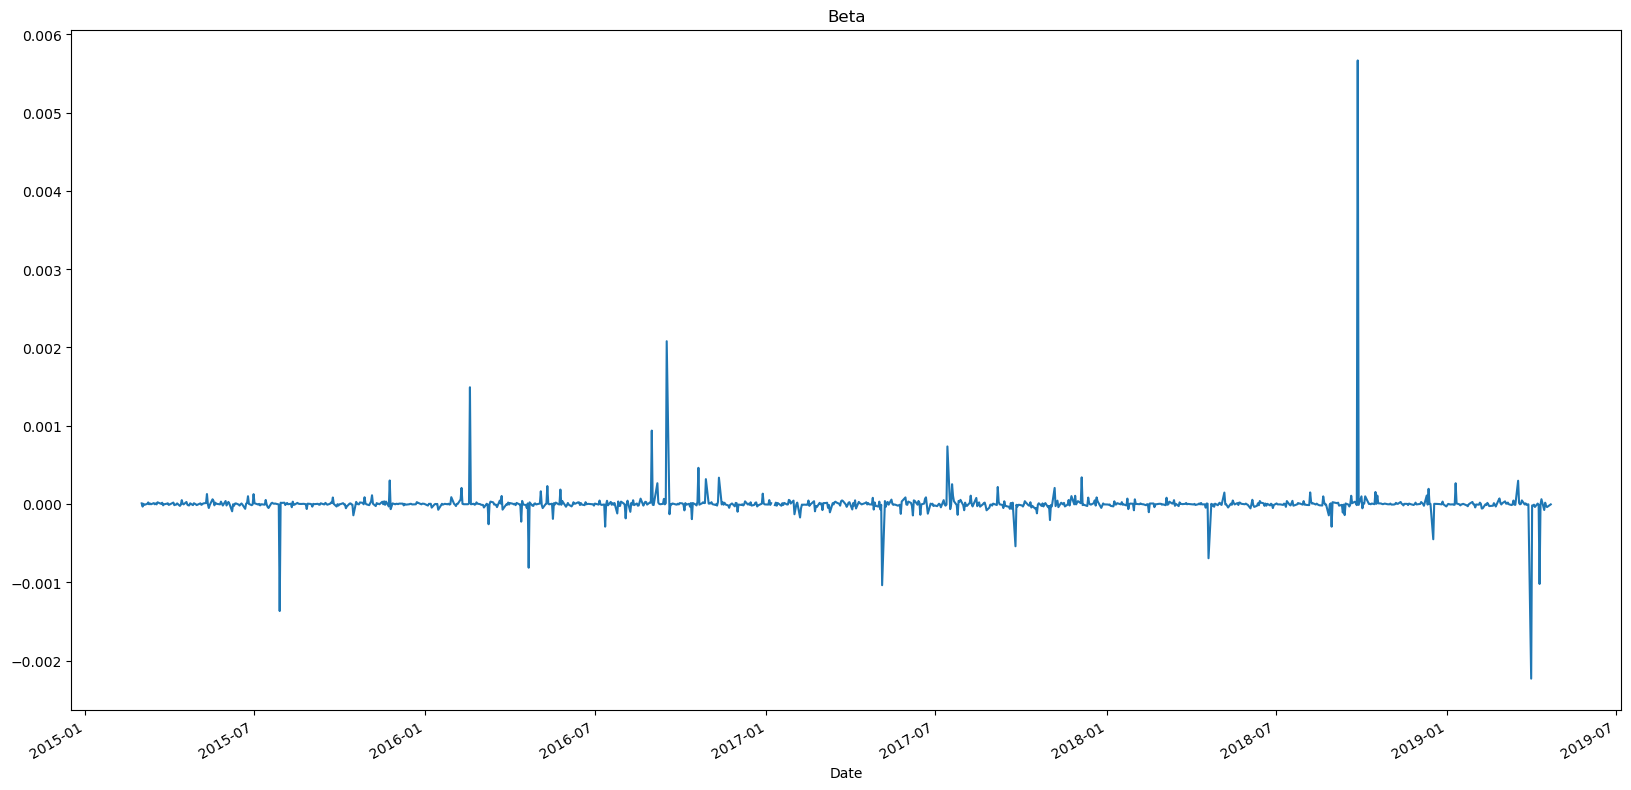

In [24]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
variance = combined_df['S&P 500']
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10),title=('Beta'));

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

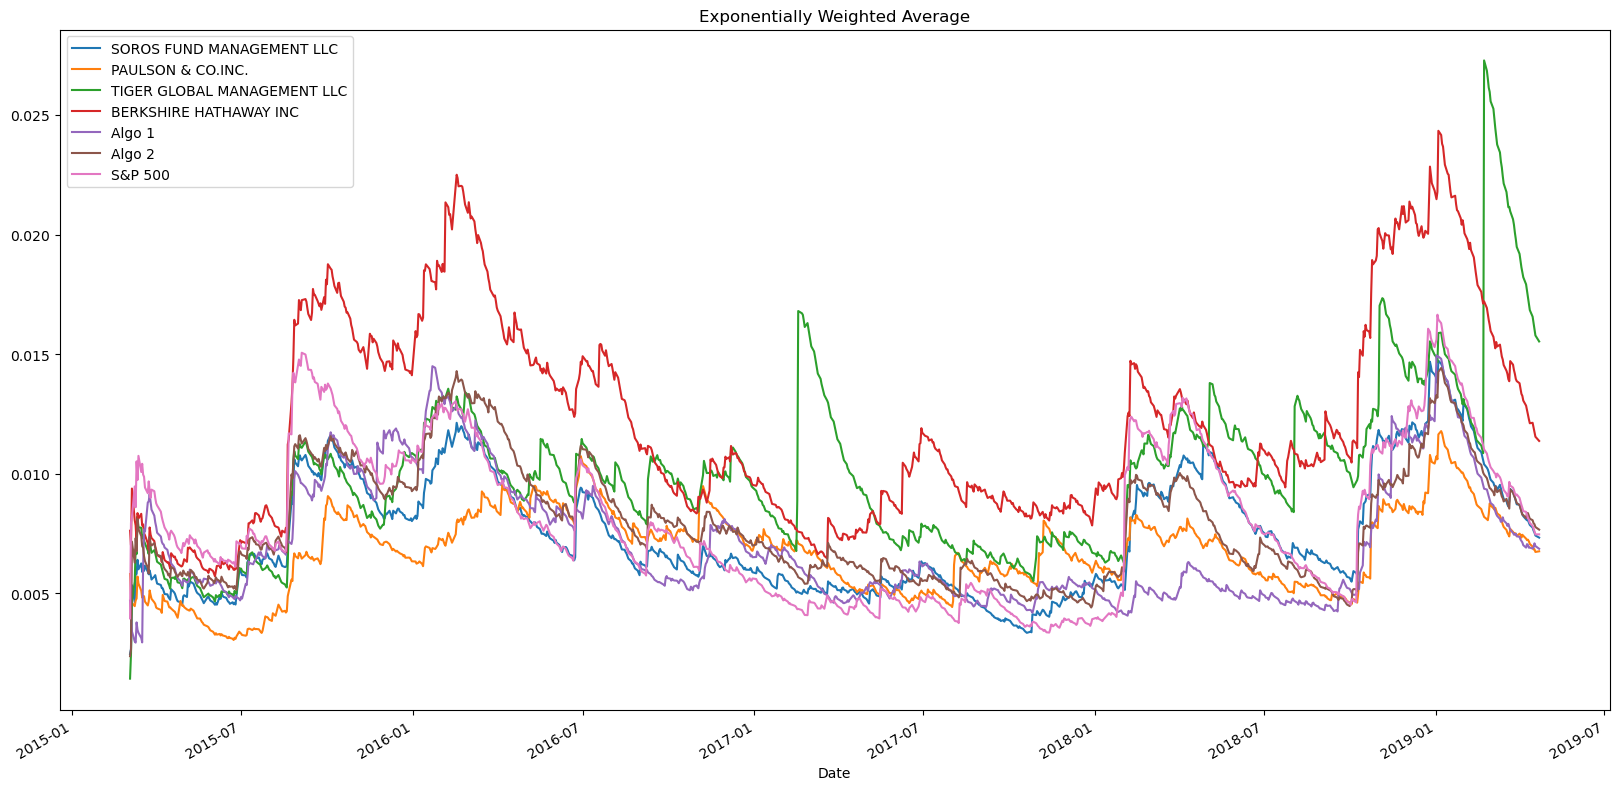

In [25]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title='Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sh_ratio = (combined_df.mean()) / (combined_df.std())
sh_ratio

SOROS FUND MANAGEMENT LLC      0.021600
PAULSON & CO.INC.             -0.030957
TIGER GLOBAL MANAGEMENT LLC   -0.008201
BERKSHIRE HATHAWAY INC         0.038221
Algo 1                         0.086276
Algo 2                         0.030510
S&P 500                       -0.032668
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

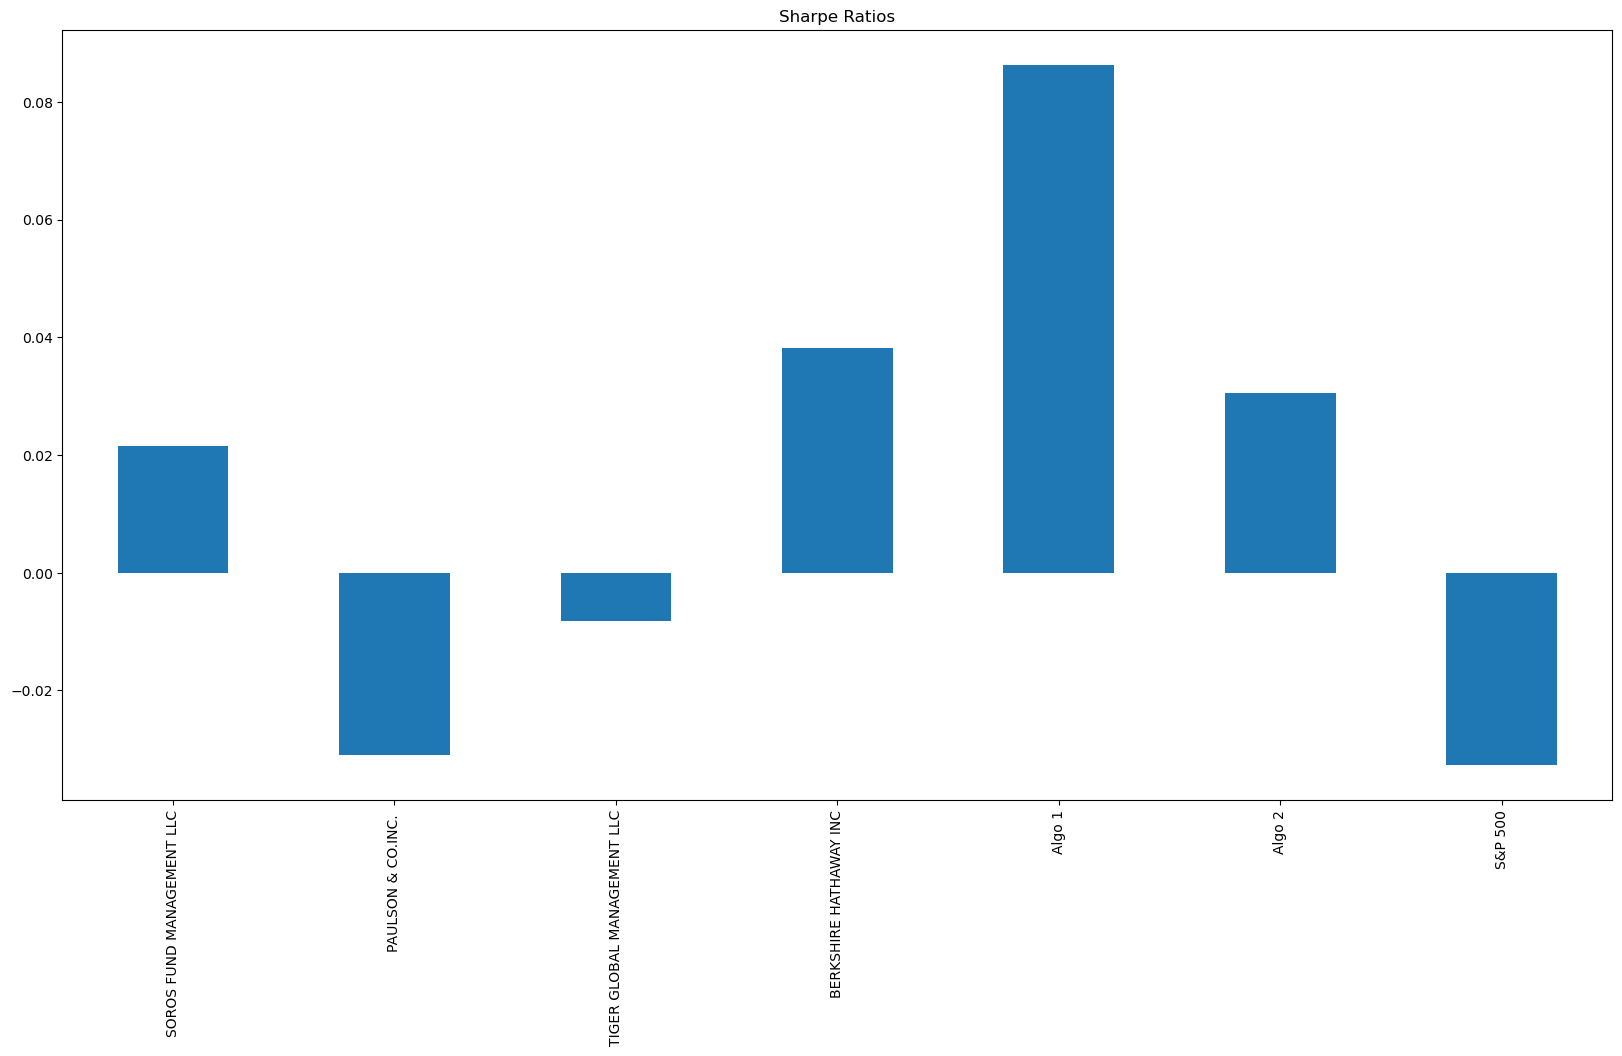

In [27]:
# Visualize the sharpe ratios as a bar plot
sh_ratio.plot(kind='bar', title='Sharpe Ratios', figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
aapl_csv = Path('../Whale-Analysis-MOD-4/aapl_historical.csv')
aapl = pd.read_csv(aapl_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
aapl.rename( columns={'Symbol' : 'AAPL','NOCP':'APPLE'},inplace = True )
aapl.drop(columns=['AAPL'], axis=1, inplace= True)

In [29]:
# Reading data from 2nd stock
cost_csv = Path('../Whale-Analysis-MOD-4/cost_historical.csv') 
cost = pd.read_csv(cost_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
cost.rename( columns={'Symbol' : 'COST','NOCP':'COSTCO'},inplace = True )
cost.drop(columns=['COST'], axis=1, inplace= True)

In [30]:
# Reading data from 3rd stock
goog_csv = Path('../Whale-Analysis-MOD-4/goog_historical.csv')
goog = pd.read_csv(goog_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
goog.rename( columns={'Symbol' : 'GOOG','NOCP':'GOOGLE'},inplace = True )
goog.drop(columns=['GOOG'], axis=1, inplace= True)

In [31]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([aapl, cost, goog], axis='columns', join='inner')
stocks_df.head().sort_index()

,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10
2019-05-08,202.90,241.34,1166.27
2019-05-09,200.72,243.47,1162.38


In [32]:
# Reset Date index
stocks_df.reset_index()
stocks_df.head().sort_index()


,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10
2019-05-08,202.90,241.34,1166.27
2019-05-09,200.72,243.47,1162.38


In [33]:
# Calculate daily returns
stocks_returns = stocks_df.pct_change()
# Drop NAs
stocks_returns.dropna(inplace=True)
# Display sample data
stocks_returns.head().sort_index()


,APPLE,COSTCO,GOOGLE
Trade DATE,,,
2019-05-02,-0.012279,-0.007890,-0.019226
2019-05-03,0.015685,0.001597,-0.003355
2019-05-06,0.027704,0.016862,0.013023
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-08,0.010861,-0.008749,0.003347


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stocks_returns.dot(weights)
# Display sample data
portfolio_return = pd.DataFrame(portfolio_returns)
portfolio_return.columns=['My Returns']
portfolio_return.head().sort_index()

,My Returns
Trade DATE,
2019-05-02,-0.013131
2019-05-03,0.004642
2019-05-06,0.019196
2019-05-07,0.000570
2019-05-08,0.001820


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
combined_df['My Returns'] = portfolio_return
combined_df.head().sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Returns
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
combined_risk = combined_df.std() * np.sqrt(252)
combined_risk 

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P 500                        0.152147
My Returns                     0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

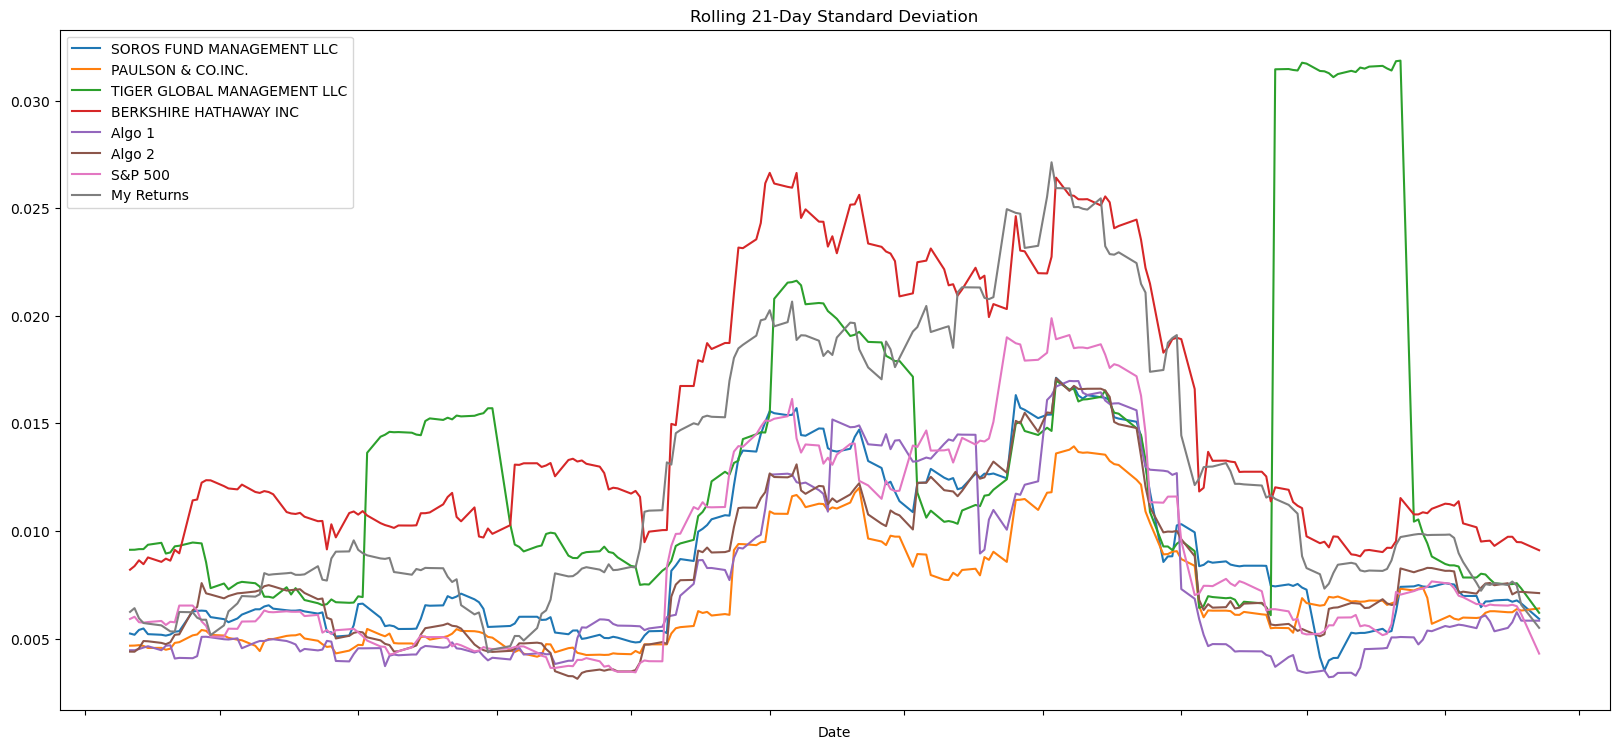

In [38]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation')
# Plot rolling standard deviation
combined_risk.rolling(window=21).std().plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
correlation = combined_df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.061503
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.025680
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.036047
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.006755
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.073296
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.039910
S&P 500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.869976
My Returns,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,0.869976,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Beta'}, xlabel='Date'>

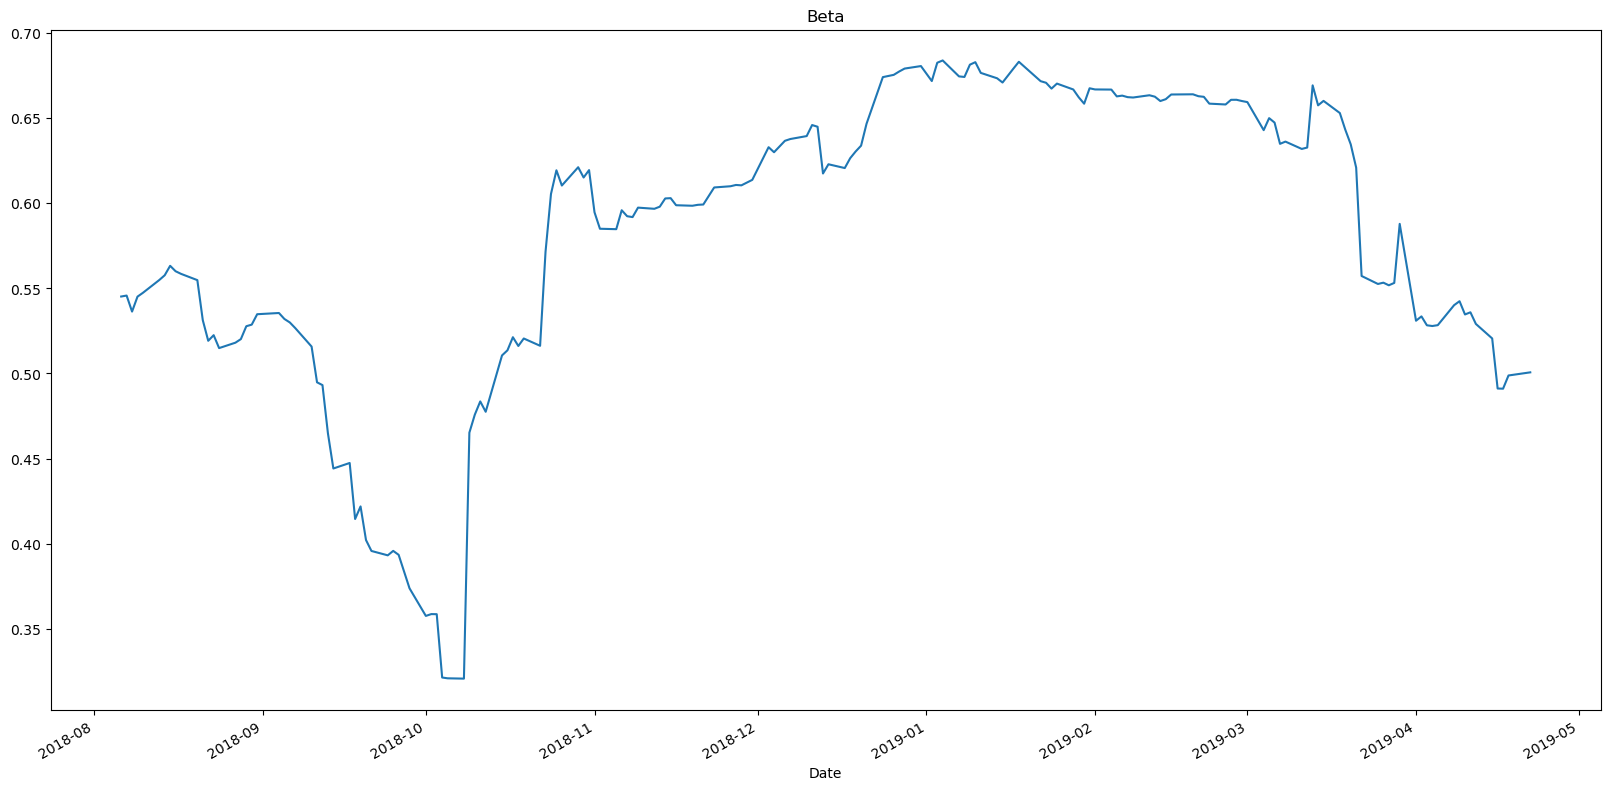

In [40]:
# Calculate and plot Beta
variance_1 = combined_df['My Returns'].rolling(window=60).var()
covariance_1 = combined_df['My Returns'].rolling(window=60).cov(combined_df['S&P 500'])
beta_1 = covariance_1 / variance_1
beta_1.plot(figsize=(20,10), title='Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
annual_sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
annual_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S&P 500                       -0.432942
My Returns                    -0.613547
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

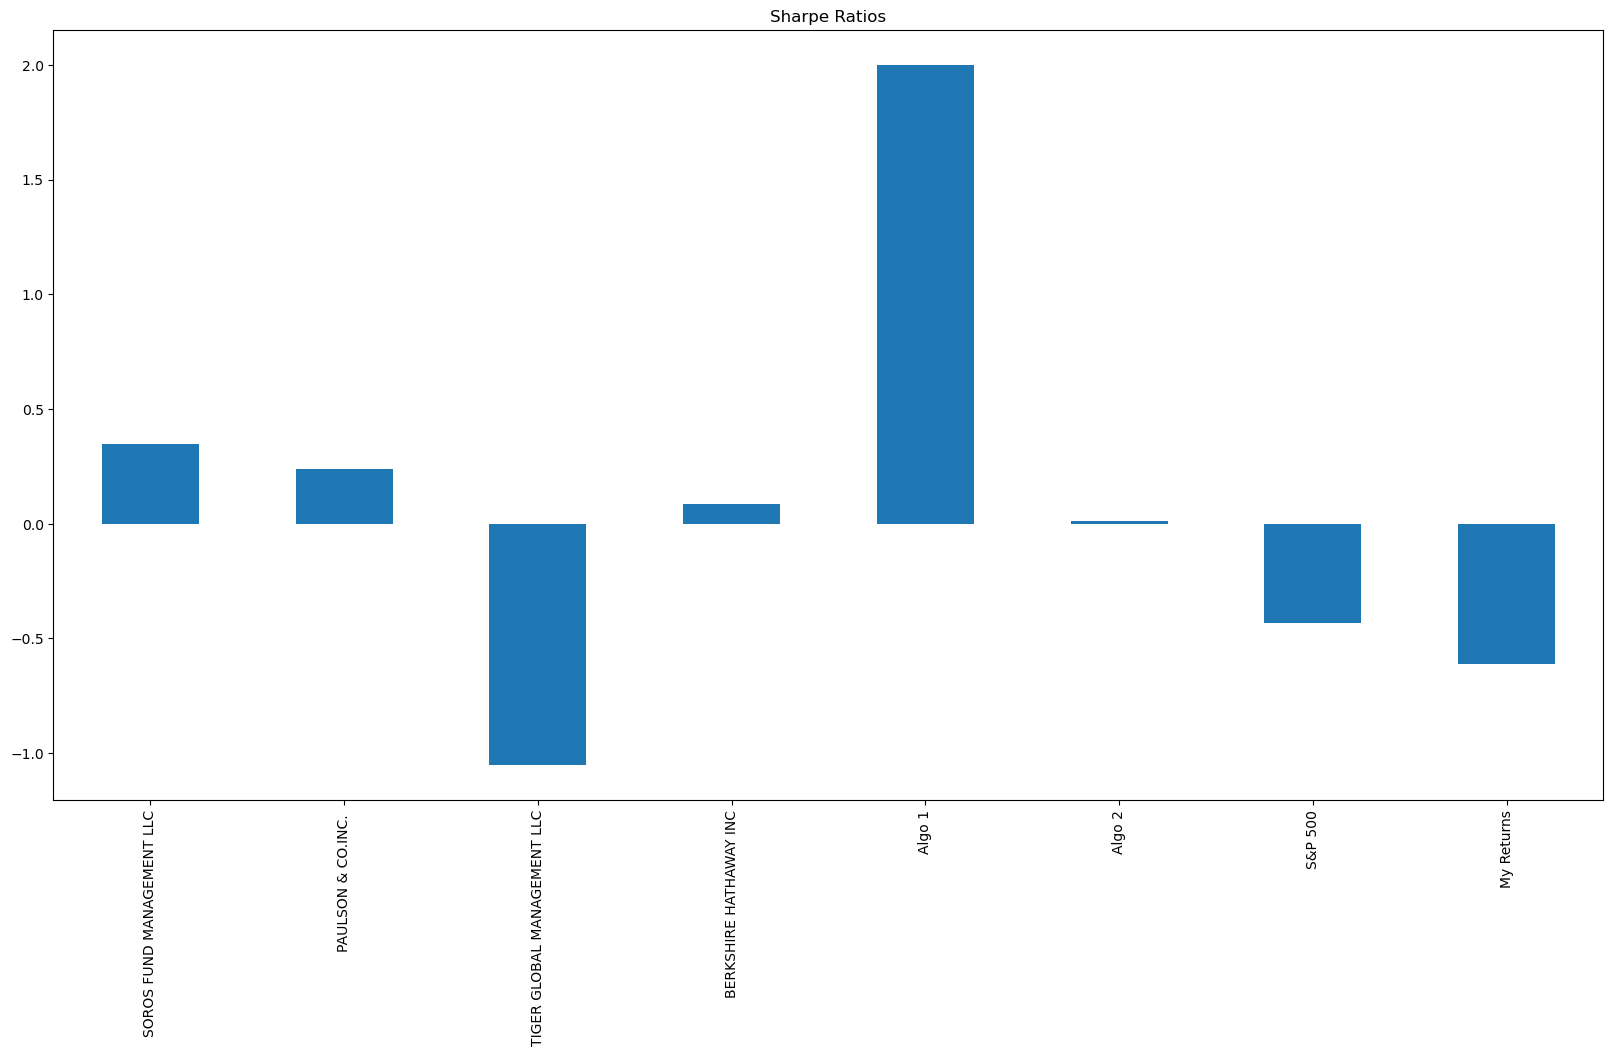

In [42]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratio.plot(kind='bar', title='Sharpe Ratios', figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [43]:
# My returns are not as good as most of these portfolios. However, it did outperform Tiger Global Management LLC.
# Algo 1 had the best performance of all the portfolios.